<a href="https://colab.research.google.com/github/BorutFlis/predictor/blob/master/Sentiment_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade fastai

     |████████████████████████████████| 204kB 8.5MB/s 
     |████████████████████████████████| 61kB 5.2MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

import warnings
warnings.filterwarnings("ignore")

Mounted at /content/gdrive


In [ ]:
from pathlib import Path
path=Path('/content/gdrive/My Drive')
from fastai.text.all import *

In [ ]:
predictor=load_learner(path/"export.pkl")

In [ ]:
!pip install twitter
!wget https://raw.githubusercontent.com/BorutFlis/Scripts/main/twitter_api.py
from twitter_api import *

     |████████████████████████████████| 61kB 5.1MB/s 
--2021-05-07 21:24:54--  https://raw.githubusercontent.com/BorutFlis/Scripts/main/twitter_api.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5432 (5.3K) [text/plain]
Saving to: ‘twitter_api.py’

twitter_api.py      100%[===================>]   5.30K  --.-KB/s    in 0s      

2021-05-07 21:24:54 (76.8 MB/s) - ‘twitter_api.py’ saved [5432/5432]



In [ ]:
API_key=''
API_secret_key=''
access_token='-4BQGpX0KN28maf8YBbG81wykSQGJVl'
access_token_secret=''

In [ ]:
twitter_api = oauth_login(API_key, API_secret_key, access_token, access_token_secret)



Enter the name of the city:jokic


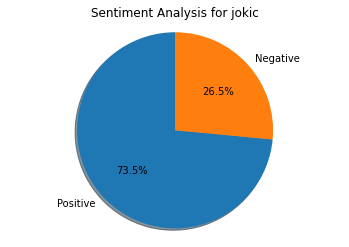

In [ ]:
import matplotlib.pyplot as plt

city_name=input("Enter the key word:")
results = twitter_search(twitter_api, city_name, max_results=100)

tweets = [tw["text"] for tw in results]
dl = predictor.dls.test_dl(tweets, bs=64) # apply transforms

preds,y = predictor.get_preds(dl=dl)

positive = sum([p[0]<p[1] for p in preds])/len(preds)


fig1, ax1 = plt.subplots()
ax1.pie([positive,1-positive], labels=["Positive","Negative"], autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Sentiment Analysis for "+city_name)

plt.show()
